In [1]:
import matplotlib.pyplot as plt 
import os
import json
import urllib
import pandas as pd
import numpy as np 
import geopandas as gpd
import json
import requests
import zipfile
import io 
%pylab inline
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip'

print("PUIdata", os.getenv("PUIDATA"))

print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")

z.extractall(path='/nfshome/mbh329/PUIdata/')

filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

PUIdata /nfshome/mbh329/PUIdata
Done
['taxi_zones.dbf', 'taxi_zones.prj', 'taxi_zones.shp', 'taxi_zones.shx']


In [3]:
taxi_zones = gpd.read_file('/nfshome/mbh329/PUIdata/taxi_zones.shp')

#downloading shapefile

In [4]:
taxi_zones #all taxi zones 

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ..."
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,..."
7,8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,..."
8,9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,..."
9,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((1044355.071716622 190734.3208969831,..."


In [5]:
taxi_zones.crs # crs of gdf

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [6]:
taxi_zonesMan = taxi_zones[taxi_zones["borough"]== "Manhattan"] #select manhattan

In [7]:
taxi_zonesMan #just manhattan taxi zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
11,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.771901235 196066.5651661754, ..."
12,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.3095727563 201248.8694928288,..."
23,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,..."
40,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.9128961712 234240.3971749842,..."
41,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"POLYGON ((1002413.191381723 243934.560382843, ..."
42,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.9733769447 217950.8072907031,..."
44,45,0.045907,0.000091,Chinatown,45,Manhattan,"POLYGON ((984941.8213095665 199431.1566655338,..."
47,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.3125067502 214463.8461607993,..."
49,50,0.055748,0.000173,Clinton West,50,Manhattan,"POLYGON ((985170.3721923977 221087.3887939602,..."


In [36]:
zone = [263, 262, 141, 140]

taxi_zonesE = taxi_zonesMan[taxi_zonesMan['LocationID'].apply(lambda x: x in zone )] 

# select just the taxi zones of area of study 

In [37]:
taxi_zonesE #taxi zones up east side

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
139,140,0.047584,0.000114,Lenox Hill East,140,Manhattan,"POLYGON ((995735.0624100119 215619.8353998661,..."
140,141,0.041514,0.000077,Lenox Hill West,141,Manhattan,"POLYGON ((994839.0728694797 216123.6982985735,..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,(POLYGON ((999804.7945504487 224498.5270484537...
262,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.3227153122 220912.3861623257,..."


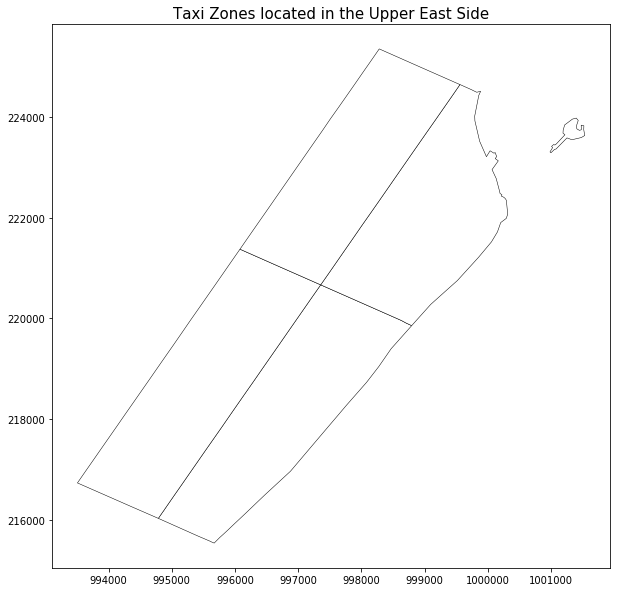

In [38]:
fig, ax = plt.subplots(figsize  = (10, 10))

ax.set_title("Taxi Zones located in the Upper East Side", fontsize=15)

ax.get_xaxis().set_visible(True) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(True) #latitude

taxi_zonesE.plot(color="white", alpha=1, edgecolor="black", legend=False, lw=.5, ax=ax)

                     
#ax.axis('')
#ax.legend()




## Downloading Subway Station point location

In [39]:
url = 'https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=Shapefile'

print("PUIdata", os.getenv("PUIDATA"))

print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")

z.extractall(path='/nfshome/mbh329/PUIdata/')

filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

PUIdata /nfshome/mbh329/PUIdata
Done
['geo_export_74e2a3b0-a55b-4afe-9d80-f6d0bac1d1fd.dbf', 'geo_export_74e2a3b0-a55b-4afe-9d80-f6d0bac1d1fd.prj', 'geo_export_74e2a3b0-a55b-4afe-9d80-f6d0bac1d1fd.shp', 'geo_export_74e2a3b0-a55b-4afe-9d80-f6d0bac1d1fd.shx']


In [12]:
subwayloc = gpd.read_file('/nfshome/mbh329/PUIdata/subwayloc_mta.shp')

In [13]:
subwayloc

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99106999861966 40.73005400028978)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019299927328 40.71880300107709)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98384899986625 40.76172799961419)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97499915116808 40.68086213682956)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89488591154061 40.66471445143568)
5,1,238th St,"1-all times, exit only northbound",6.0,http://web.mta.info/nyct/service/,POINT (-73.90087000018522 40.88466700064975)
6,A-B-C,Cathedral Pkwy (110th St),"A-nights, B-weekdays and evenings, C-all times...",7.0,http://web.mta.info/nyct/service/,POINT (-73.95806670661364 40.80058155811496)
7,A-C,Kingston - Throop Aves,"A-nights, C-all other times",8.0,http://web.mta.info/nyct/service/,POINT (-73.94085899871263 40.67991899941601)
8,E-M-R,65th St,"E-nights, R-all other times, M-weekdays and ev...",9.0,http://web.mta.info/nyct/service/,POINT (-73.8987883783301 40.74971952935675)
9,E-M-R,36th St,"E-nights, R-all other times, M-weekdays and ev...",10.0,http://web.mta.info/nyct/service/,POINT (-73.92901818461539 40.75196004401078)


In [14]:
subwayloc.groupby('line').head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99106999861966 40.73005400028978)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019299927328 40.71880300107709)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98384899986625 40.76172799961419)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97499915116808 40.68086213682956)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89488591154061 40.66471445143568)
5,1,238th St,"1-all times, exit only northbound",6.0,http://web.mta.info/nyct/service/,POINT (-73.90087000018522 40.88466700064975)
6,A-B-C,Cathedral Pkwy (110th St),"A-nights, B-weekdays and evenings, C-all times...",7.0,http://web.mta.info/nyct/service/,POINT (-73.95806670661364 40.80058155811496)
7,A-C,Kingston - Throop Aves,"A-nights, C-all other times",8.0,http://web.mta.info/nyct/service/,POINT (-73.94085899871263 40.67991899941601)
8,E-M-R,65th St,"E-nights, R-all other times, M-weekdays and ev...",9.0,http://web.mta.info/nyct/service/,POINT (-73.8987883783301 40.74971952935675)
9,E-M-R,36th St,"E-nights, R-all other times, M-weekdays and ev...",10.0,http://web.mta.info/nyct/service/,POINT (-73.92901818461539 40.75196004401078)


In [15]:
subwayloc['objectid'] = subwayloc['objectid'].astype(int) #here i am turning 


subwayloc.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1,http://web.mta.info/nyct/service/,POINT (-73.99106999861966 40.73005400028978)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2,http://web.mta.info/nyct/service/,POINT (-74.00019299927328 40.71880300107709)
2,1-2,50th St,"1-all times, 2-nights",3,http://web.mta.info/nyct/service/,POINT (-73.98384899986625 40.76172799961419)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4,http://web.mta.info/nyct/service/,POINT (-73.97499915116808 40.68086213682956)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5,http://web.mta.info/nyct/service/,POINT (-73.89488591154061 40.66471445143568)


In [40]:

subway = [641, 642, 643]

subway_locE = subwayloc[subwayloc['objectid'].apply(lambda x: x in subway )]

In [41]:
subway_locE

,line,name,notes,objectid,url,geometry
470,Q,72nd St,Q-all times,641,http://web.mta.info/nyct/service/,POINT (-73.95836178682246 40.76880251014895)
471,Q,86th St,Q-all times,642,http://web.mta.info/nyct/service/,POINT (-73.95177090964917 40.77786104333163)
472,Q,96th St,Q-all times,643,http://web.mta.info/nyct/service/,POINT (-73.9470660219183 40.78423665017765)


In [42]:
subway_locE.crs

{'init': 'epsg:4326'}

In [43]:

subway_locE.drop(['notes', 'url',], axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
subwayE = subway_locE.to_crs(epsg=2263)


In [45]:
taxiE = taxi_zonesE.to_crs(epsg=2263)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


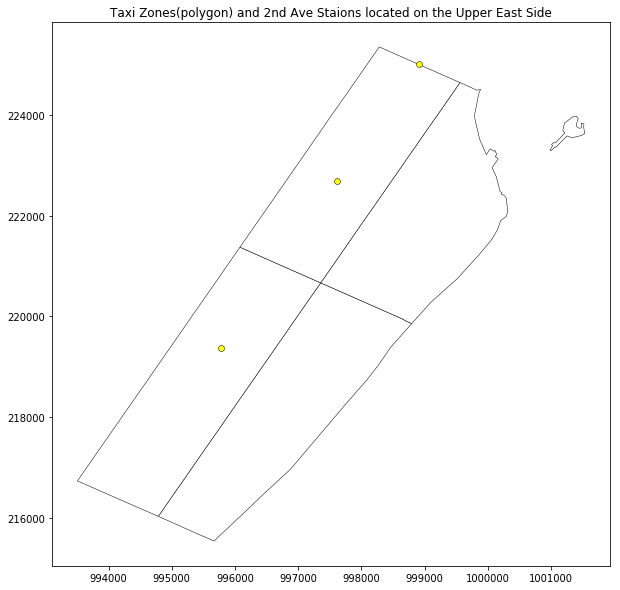

In [47]:
fig, ax = plt.subplots(figsize  = (10, 10))

ax.set_title("Taxi Zones(polygon) and 2nd Ave Staions located on the Upper East Side")
             

ax.get_xaxis().set_visible(True) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(True) #latitude

taxiE.plot(color="white", alpha=1, edgecolor="black", legend=False, lw=.5, ax=ax)

subwayE.plot(column='name', color="yellow", alpha=1, edgecolor="black", legend=True, lw=.5, ax=ax)